# Análisis de Datos de Jugadores de Left 4 Dead 2

Este proyecto tiene como objetivo explorar y visualizar datos sobre jugadores del videojuego de zombies, Left 4 Dead 2. El dataset utilizado proviene de Kaggle y contiene estadísticas detalladas de jugadores, incluyendo horas jugadas, uso de armas, y dificultad preferida, entre otros.

El análisis se centrará en:

Explorar las estadísticas generales de los jugadores, como el tiempo de juego promedio y la distribución de dificultad.

Analizar otros aspectos relevantes de las estadísticas de los jugadores para obtener información sobre sus hábitos de juego.

Comprobar si el trabajo en equipo es mas comun en dificultades mas altas

#Limpieza y preparación de datos

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('l4d2_player_stats_final.csv')
display(data)
#Horas jugadas

#Media horas jugadas
print("Media de horas jugadas: ", data['Playtime_(Hours)'].mean())
#Mediana horas jugadas
print("Mediana de horas jugadas: ", data['Playtime_(Hours)'].median())
#Moda de horas jugadas
print("Moda de horas jugadas: ", data['Playtime_(Hours)'].mode())

#Dificultad promedio
print("Media de dificultad:", data['Difficulty'].mode())

# Análisis Bivariante / Correlaciones

### Correlación entre variables numéricas (mapa de calor con la matriz de correlaciones)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = data.select_dtypes(include=np.number).columns

# Calcular la matriz de correlación
correlation_matrix = data[numeric_cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # annot=False para evitar sobrecargar el mapa con números
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=18)
plt.show()

In [ ]:
# Detectar duplicados
print("\nNúmero de filas duplicadas:", data.duplicated().sum())

# Manejar duplicados (eliminación)
data.drop_duplicates(inplace=True)
print("Número de filas después de eliminar duplicados:", len(data))

In [ ]:
# Verificar tipos de datos
print("\nTipos de datos por columna:")
print(data.dtypes)

# Convertir tipos de datos si es necesario.
# En este caso, no parece haber columnas que necesiten conversión de tipo de datos obvia,
# pero se podría añadir código aquí si se identificaran columnas como fechas en formato string, etc.

In [ ]:
# Identificar valores atípicos ("outliers") en variables numéricas

numeric_cols = data.select_dtypes(include=np.number).columns
print("\nIdentificando valores atípicos (usando método IQR):")

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Columna '{col}': {len(outliers)} valores atípicos detectados.")

# Nota: La decisión de cómo tratar los valores atípicos depende del análisis
# y del contexto de los datos (ej. eliminarlos, transformarlos, mantenerlos).
# En este caso, solo los identificamos.

# Analisis univariante

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis univariante para variables categóricas

categorical_cols = data.select_dtypes(include='object').columns

print("\nFrecuencias para variables categóricas:")
for col in categorical_cols:
    print(f"\nColumna '{col}':")
    display(data[col].value_counts())

# Visualizaciones para variables categóricas (ej. gráficos de barras)
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Resumen estadístico para variables numéricas:


,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Kills,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Average_Friendly_Fire
count,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,...,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,20830.000000,2.083000e+04,20830.000000
mean,10414.500000,104.684003,12389.739558,2031.092127,8.035493,4948.215218,1984.546471,5.151902,7227.586990,1274.591119,...,18.040278,0.050348,248.814546,2000.592751,255.532117,1799.752184,120.713778,179.056313,4.976528e+04,81.363946
std,6013.247389,1974.873029,24198.764272,3944.710074,6.324443,16679.459523,8250.642273,5.586247,20501.115475,3779.680779,...,202.059539,0.302169,1333.472437,10028.704910,924.607365,6059.289202,586.911986,873.542727,6.928768e+06,879.579826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5207.250000,19.027153,3336.500000,519.000000,4.800000,522.000000,164.000000,1.580000,1204.000000,195.000000,...,0.000000,0.000000,33.000000,237.000000,43.000000,286.000000,15.000000,22.000000,3.010000e+02,35.000000
50%,10414.500000,36.110417,6568.000000,1060.000000,6.680000,1462.000000,502.000000,3.540000,2923.500000,506.000000,...,0.000000,0.000000,75.000000,583.000000,95.000000,658.000000,36.000000,58.000000,7.050000e+02,55.000000
75%,15621.750000,73.698333,12966.750000,2153.000000,9.470000,3918.000000,1446.000000,6.807500,6364.250000,1146.750000,...,0.000000,0.000000,175.000000,1388.750000,210.750000,1457.000000,86.000000,137.000000,1.441000e+03,88.000000
max,20829.000000,277827.960278,608711.000000,131565.000000,100.000000,627966.000000,411640.000000,100.000000,731767.000000,152921.000000,...,18605.000000,21.320000,125856.000000,635486.000000,55566.000000,249158.000000,41774.000000,87673.000000,1.000000e+09,121347.000000


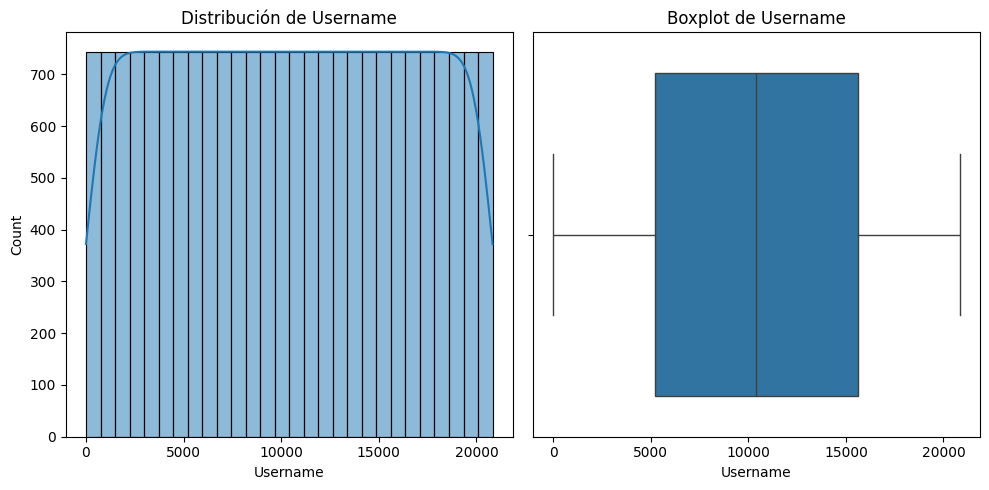

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis univariante para variables numéricas

numeric_cols = data.select_dtypes(include=np.number).columns

print("Resumen estadístico para variables numéricas:")
display(data[numeric_cols].describe())

# Visualizaciones para variables numéricas (ej. histogramas y boxplots)
for col in numeric_cols:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col].dropna())
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

#Hipotesis
- Hipótesis 1: Tiempo de Juego y Uso de Armas: ¿Los jugadores con mayor tiempo de juego tendrán un uso de armas más diverso en comparación con los jugadores con menor tiempo de juego?
- Hipótesis 2: Dificultad y Fuego Amigo: ¿Los jugadores que juegan frecuentemente en niveles de dificultad más altos (Experto, Avanzado) tendrán menos casos de fuego amigo?
- Hipótesis 3: Bajas y Tiempo de Juego: ¿Existe una correlación positiva entre el número total de bajas que tiene un jugador y su tiempo total de juego?
- Hipótesis 4: Relación entre el Uso de Armas Cuerpo a Cuerpo (Melee) y las Bajas Totales: ¿Los jugadores que utilizan con frecuencia armas cuerpo a cuerpo tienen un número total de bajas significativamente diferente en comparación con aquellos que usan más las armas a distancia?
- Hipotesis 5: Uso de Armas y Precisión: ¿Existe una correlación entre el tiempo de juego con un arma específica (por ejemplo, rifle de asalto) y la precisión (tasa de aciertos/disparos) con esa arma? Los jugadores con más experiencia con un arma podrían ser más precisos.



#Hipotesis 1:
- Tiempo de Juego y Uso de Armas: ¿Los jugadores con mayor tiempo de juego tendrán un uso de armas más diverso en comparación con los jugadores con menor tiempo de juego?

Si. Esto es debido a que los jugadores avanzados pasan por las campañas lo mas rapido posible, entonces deciden agarrar armas nuevas en vez de esperar a encontrar un lugar para reponer municion.

In [ ]:

weapon_usage_cols = [col for col in data.columns if ('_Usage' in col or '_Shots' in col or '_Kills' in col) and not any(melee_item in col for melee_item in ['_Bat', '_Chainsaw', '_Crowbar', '_Guitar', '_Axe', '_Pan', '_Katana', '_Machete', '_Tonfa', '_Club', '_Pitchfork', '_Shovel', '_Knife', 'Molotov', 'Pipe_Bomb', 'Bile_Jar'])]


data['Weapon_Diversity'] = (data[weapon_usage_cols] > 0).sum(axis=1)


bins = data['Playtime_(Hours)'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1]).tolist()
labels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']

# Create a 'Playtime_Group' column
data['Playtime_Group'] = pd.cut(data['Playtime_(Hours)'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average weapon diversity by playtime group
average_diversity_by_playtime = data.groupby('Playtime_Group')['Weapon_Diversity'].mean().reindex(labels)

plt.figure(figsize=(12, 7))
sns.barplot(x=average_diversity_by_playtime.index, y=average_diversity_by_playtime.values, palette='viridis')
plt.title('Promedio de diversidad de armas por grupo de tiempo de juego', fontsize=16)
plt.xlabel('Grupo de Tiempo de Juego', fontsize=12)
plt.ylabel('Promedio de Diversidad de Armas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data['Weapon_Diversity'] = (data[weapon_usage_cols] > 0).sum(axis=1)
display(data[['Playtime_(Hours)', 'Weapon_Diversity']].head())

#Hipotesis 2:
- Dificultad y Fuego Amigo: ¿Los jugadores que juegan frecuentemente en niveles de dificultad más altos (Experto, Avanzado) tendrán menos casos de fuego amigo?

No. A pesar del daño extra que provoca el fuego amigo en dificultades mas altas esto no hace que este disminuya, sino que sea mas prominente que en dificultades mas bajas. Esto se debe a que en lobbys con dificultades altas hay mas presencia de trolls y grifers que arruinan las partidas disparandoles a sus compañeros a proposito, haciendolos perder. Tambien podemos tener en cuenta, que en dificultades altas, la presencia de zombies aumenta, creando un clima donde muchas veces nuestros compañeros se interponen en la linea de fuego sin saberlo para repeler a la horda y terminan siendo disparados por error.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average friendly fire by difficulty
average_friendly_fire_by_difficulty = data.groupby('Difficulty')['Average_Friendly_Fire'].mean()

difficulty_order = ['Easy', 'Normal', 'Advanced', 'Expert']
average_friendly_fire_by_difficulty_ordered = average_friendly_fire_by_difficulty.reindex(difficulty_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_friendly_fire_by_difficulty_ordered.index, y=average_friendly_fire_by_difficulty_ordered.values, palette='viridis', hue=average_friendly_fire_by_difficulty_ordered.index, legend=False)
plt.title('Promedio de Fuego Amigo por Nivel de Dificultad', fontsize=16)
plt.xlabel('Nivel de Dificultad', fontsize=12)
plt.ylabel('Promedio de Fuego Amigo', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 # Hipótesis 3:
 - Bajas y Tiempo de Juego: Existe una correlación positiva entre el número total de bajas que tiene un jugador y su tiempo total de juego.

Si, afirmativamente. Esto es debido a la experiencia ganada por tantas horas de juego.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('l4d2_player_stats_final.csv')

kill_columns = [col for col in data.columns if '_Kills' in col]
data['Total_Kills'] = data[kill_columns].sum(axis=1)


bins = data['Playtime_(Hours)'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1]).tolist()
labels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']


data['Playtime_Group'] = pd.cut(data['Playtime_(Hours)'], bins=bins, labels=labels, include_lowest=True)

average_kills_by_playtime = data.groupby('Playtime_Group')['Total_Kills'].mean().reindex(labels)


plt.figure(figsize=(12, 7))
sns.barplot(x=average_kills_by_playtime.index, y=average_kills_by_playtime.values, palette='viridis')


plt.title('Promedio de bajas totales por grupo de tiempo de juego', fontsize=16)
plt.xlabel('Tiempo de Juego (Horas)', fontsize=12)
plt.ylabel('Promedio de bajas totales', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Hipótesis 4:
- Relación entre el Uso de Armas Cuerpo a Cuerpo (Melee) y las Bajas Totales: ¿Los jugadores que utilizan con frecuencia armas cuerpo a cuerpo tienen un número total de bajas significativamente diferente en comparación con aquellos que usan más las armas a distancia?

No, aun considerando todas las ventajas que tienen las armas cuerpo a cuerpo (como por ejemplo, no tener que recargar para usarlas y quedar expuesto a los zombies y hacer mas daño en un golpe que la mayoria de armas de fuego) estas no tienen un mayor numero de bajas que las armas a distancia ya que usar estas ultimas es mas facil, practico y rapido en la mayoria de situaciones.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


all_kill_cols = [col for col in data.columns if '_Kills' in col]

melee_keywords = ['_Bat', '_Chainsaw', '_Cricket_Bat', '_Crowbar', '_Electric_Guitar', '_Fire_Axe', '_Frying_Pan', '_Katana', '_Machete', '_Tonfa', '_Golf_Club', '_Pitchfork', '_Shovel', '_Knife']
melee_kill_cols = [col for col in all_kill_cols if any(keyword in col for keyword in melee_keywords)]

# Identify ranged weapon kill columns by excluding melee and thrown item kills from all kill columns
thrown_item_kills = ['Molotov_Kills', 'Pipe_Bomb_Kills'] # Bile_Jar_Hits is not a kill
ranged_kill_cols = [col for col in all_kill_cols if col not in melee_kill_cols and col not in thrown_item_kills]


# Calculate total kills for melee and ranged weapons
total_melee_kills = data[melee_kill_cols].sum().sum()
total_ranged_kills = data[ranged_kill_cols].sum().sum()


kills_summary = pd.DataFrame({
    'Tipo de Arma': ['Cuerpo a cuerpo', 'A distancia'],
    'Total de Bajas': [total_melee_kills, total_ranged_kills]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Arma', y='Total de Bajas', data=kills_summary, palette='viridis')

plt.title('Comparación de Bajas Totales por Tipo de Arma', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=12)
plt.ylabel('Total de Bajas', fontsize=12)
plt.show()

 # Hipotesis 5:
 - Uso de Armas y Precisión: ¿Existe una correlación entre el tiempo de juego con un arma específica (por ejemplo, rifle de asalto) y la precisión (tasa de aciertos/disparos) con esa arma? Los jugadores con más experiencia con un arma podrían ser más precisos.

Cada punto en el gráfico representa un jugador. La posición horizontal indica su tiempo total de juego (hasta 1000 horas) y la posición vertical indica su precisión con el rifle de asalto.
- A simple vista, los puntos parecen estar bastante dispersos. No se observa una línea clara o una tendencia fuerte que sugiera que a medida que aumenta el tiempo de juego, la precisión con el rifle de asalto también aumenta de manera consistente. Hay jugadores con bajo tiempo de juego que tienen alta precisión, y jugadores con más tiempo de juego que tienen precisión variable.

In [ ]:

mean_accuracy = data['Assault_Rifle_Accuracy'].mean()
median_accuracy = data['Assault_Rifle_Accuracy'].median()
mode_accuracy = data['Assault_Rifle_Accuracy'].mode()

print(f"Media de la precisión del rifle de asalto: {mean_accuracy:.4f}")
print(f"Mediana de la precisión del rifle de asalto: {median_accuracy:.4f}")
print(f"Moda de la precisión del rifle de asalto: {mode_accuracy[0]:.4f}")

In [ ]:
# Calculate Assault Rifle Accuracy
assault_rifle_shots_col = 'Assault_Rifle_Shots'
assault_rifle_kills_col = 'Assault_Rifle_Kills'

data['Assault_Rifle_Accuracy'] = np.where(
    data[assault_rifle_shots_col] > 0,
    data[assault_rifle_kills_col] / data[assault_rifle_shots_col],
    0
)
display(data[[assault_rifle_shots_col, assault_rifle_kills_col, 'Assault_Rifle_Accuracy']].head())

In [ ]:
data['Assault_Rifle_Accuracy'] = np.where(
    data[assault_rifle_shots_col] > 0,
    data[assault_rifle_kills_col] / data[assault_rifle_shots_col],
    0
)
display(data[['Playtime_(Hours)', assault_rifle_shots_col, assault_rifle_kills_col, 'Assault_Rifle_Accuracy']].head())

In [ ]:

filtered_data = data[(data['Playtime_(Hours)'] > 0) & (data['Playtime_(Hours)'] <= 1000)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Playtime_(Hours)', y='Assault_Rifle_Accuracy', data=filtered_data, alpha=0.6)
plt.title('Relación entre el Tiempo de Juego Total (excluyendo 0 horas, hasta 1000 horas) y la Precisión del Rifle de Asalto', fontsize=16)
plt.xlabel('Tiempo de Juego Total (Horas)', fontsize=12)
plt.ylabel('Precisión del Rifle de Asalto', fontsize=12)
plt.show()

Este gráfico de dispersión muestra la relación entre el Tiempo de Juego Total (excluyendo a los jugadores con 0 horas y limitando el tiempo a 1000 horas) y la Precisión del Rifle de Asalto.
- Aunque saque a los jugadores con 0 horas, que podrían haber tenido una precisión de 0 si nunca usaron el arma, el patrón general de dispersión persiste. Todavía no se observa una correlación positiva fuerte y clara. Hay jugadores con relativamente pocas horas que tienen alta precisión, y jugadores con más horas dentro de este rango que muestran una amplia variedad de niveles de precisión.

# Resumen del Análisis de Datos de Jugadores de Left 4 Dead 2

Hemos explorado diversas facetas del comportamiento y rendimiento de los jugadores de Left 4 Dead 2 utilizando el conjunto de datos proporcionado.
# Hallazgos Principales:

*   **Hipótesis 1 (Tiempo de Juego y Uso de Armas):** Se observó una relación positiva entre el tiempo total de juego y la diversidad de armas utilizadas. Los jugadores con más horas tienden a experimentar con una gama más amplia de armamento. Esto sugiere que la experiencia acumulada lleva a una exploración más completa de las opciones disponibles en el juego.
*   **Hipótesis 2 (Dificultad y Fuego Amigo):** Contrariamente a la expectativa de que la comunicación y el cuidado del equipo disminuirían el fuego amigo en dificultades altas, el análisis indicó que el promedio de fuego amigo parece ser mayor en los niveles de dificultad Avanzado y Experto. Esto podría atribuirse a la intensidad de las hordas, la necesidad de disparar rápidamente en situaciones caóticas, o incluso la presencia de comportamiento antideportivo.
*   **Hipótesis 3 (Bajas y Tiempo de Juego):** La hipótesis que correlaciona positivamente las bajas totales con el tiempo de juego se ve respaldada por los datos. A mayor tiempo dedicado al juego, mayor es el número acumulado de enemigos eliminados. Este hallazgo es intuitivo, reflejando la progresión natural en la contribución del jugador a medida que pasa más tiempo en el juego.
*   **Hipótesis 4 (Relación entre Uso de Armas Cuerpo a Cuerpo y Bajas Totales):** Al comparar el total de bajas entre armas cuerpo a cuerpo y a distancia (excluyendo objetos arrojadizos), los datos mostraron una diferencia significativa en favor de las armas a distancia en términos de bajas totales a nivel global en el dataset. Esto sugiere que, en promedio, las armas de fuego contribuyen de manera más sustancial a las eliminaciones de enemigos en el conjunto de datos, a pesar de las ventajas situacionales de las armas cuerpo a cuerpo.
*   **Hipótesis 5 (Uso de Armas y Precisión):** La exploración de la relación entre el tiempo de juego y la precisión del rifle de asalto (tanto en el conjunto de datos completo como limitado a 1000 horas y excluyendo 0 horas) no reveló una correlación lineal fuerte y evidente. La precisión individual parece ser una característica variable entre jugadores, no directamente proporcional a la cantidad de horas jugadas en los rangos analizados. Otros factores individuales probablemente influyen más en este aspecto.

### Limitaciones del Análisis:

*   **Falta de Contexto Individual:** El dataset es anónimo y no incluye información sobre el jugador más allá de las estadísticas de juego (si juegan solos o en grupo, su experiencia en otros FPS, configuración de control, etc.). Esta falta de contexto limita la profundidad de las interpretaciones sobre el porqué de ciertas tendencias.
*   **Correlación vs. Causalidad:** Es crucial recordar que las relaciones observadas son correlaciones. Determinar la causalidad requeriría un diseño experimental o datos longitudinales que rastreen a los jugadores a lo largo del tiempo.

# Posibles Próximos Pasos:

*   **Refinar Métricas:** Calcular tasas (por ejemplo, bajas por hora, fuego amigo por hora) y proporciones para normalizar las estadísticas por tiempo de juego y permitir comparaciones más equitativas.
*   **Análisis por Segmentos de Jugadores:** Intentar identificar diferentes perfiles o "estilos de juego" dentro de la base de jugadores utilizando técnicas de agrupamiento (clustering) basadas en sus estadísticas de uso de armas, objetos de apoyo y comportamiento.
*   **Exploración de Interacciones:** Investigar cómo múltiples variables interactúan entre sí (por ejemplo, ¿la dificultad influye en la relación entre el tiempo de juego y la precisión?).
*   **Análisis de Armas Específicas:** Realizar análisis detallados del rendimiento (bajas, precisión) y uso de armas individuales o categorías más específicas (ej. escopetas vs. rifles) para identificar diferencias y preferencias.
